In [1]:
!mkdir models4

In [2]:
!ls

models
models2
models3
models4
RNN_LSTM_Keras_working_35epo_selected.ipynb
RNN_LSTM_Keras_working_50_epo_adam.ipynb
RNN_LSTM_Keras_working_50_epo_selected.ipynb
RNN_LSTM_Keras_working.ipynb
RNN_LSTM_Keras_working-just_for_50ep_SGD_Momentum-Copy1.ipynb
RNN_LSTM_Keras_working-just_for_SGD_Momentum.ipynb


In [2]:
%matplotlib inline

from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras import optimizers

from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed, LSTM
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


def img_resize(org_imgs, target_size):
  x_imgs = []
  for i in range(0,org_imgs.shape[0]):
    x_img = cv2.resize(org_imgs[i], dsize=(target_size, target_size), interpolation=cv2.INTER_CUBIC)
    x_imgs.append(x_img)
  return np.array(x_imgs)


def plot_model(model_details):

    # Create sub-plots
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # Summarize history for loss
    axs[1].plot(range(1,len(model_details.history['loss'])+1),model_details.history['loss'])
    axs[1].plot(range(1,len(model_details.history['val_loss'])+1),model_details.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_details.history['loss'])+1),len(model_details.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_details.history['acc'])+1),model_details.history['acc'])
    axs[0].plot(range(1,len(model_details.history['val_acc'])+1),model_details.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_details.history['acc'])+1),len(model_details.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # Show the plot
    plt.show()
    
    
# Training parameters.
batch_sizes = [64,128]
num_epochs = [50]
learning_rates = [0.01,0.05]
optimizers_name = ['sgd']
num_classes = 10
node_sizes = [128]

# The data, shuffled and split between train and test sets.
(images, labels), (_, _) = fashion_mnist.load_data()

images_zoomed_in = img_resize(images, 48)
images_zoomed_in = images_zoomed_in.reshape(images_zoomed_in.shape[0], images_zoomed_in.shape[1], images_zoomed_in.shape[2], 1).astype('float32')

x_train = images_zoomed_in[0:50000]
x_test = images_zoomed_in[50000:60000]

y_train = labels[0:50000]
y_test = labels[50000:60000]


# x_train -= np.mean(x_train)
# x_test -= np.mean(x_train)

# x_train /= np.std(x_train)
# x_test /= np.std(x_train)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


TRAIN_DATA_SIZE = x_train.shape[0]
TEST_DATA_SIZE = x_test.shape[0]

#TRAIN_BATCH_SIZE = 20
#TEST_BATCH_SIZE = 10

#train_step = int(TRAIN_DATA_SIZE/TRAIN_BATCH_SIZE)
#test_step = int(TEST_DATA_SIZE/TEST_BATCH_SIZE)


# Converts class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

train_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
train_gen.fit(x_train)
#train_batches = train_gen.flow(x_train, y_train, batch_size=TRAIN_BATCH_SIZE, shuffle=False, seed=10)

test_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_gen.fit(x_train)
#test_batches = test_gen.flow(x_test, y_test, batch_size=TEST_BATCH_SIZE, shuffle=False, seed=10)

#row, col, pixel = x_train.shape[1:]


best_model = None
best_accuracy = 0
best_batch_size = 0
best_epochs = 0
best_optimizer = ''
best_learning_rate = 0
best_node_size = 0

x_train shape: (50000, 48, 48, 1)
50000 train samples
10000 test samples


batch size    : 64
epochs        : 50
optimizer     : sgd
learning rate : 0.01
node size     : 128
Epoch 1/50
781/781 [==============================] - 96s 123ms/step - loss: 1.2621 - acc: 0.5144 - val_loss: 0.7350 - val_acc: 0.7174

Epoch 00001: val_loss improved from inf to 0.73500, saving model to models4/rnn_lstm.h5
Epoch 2/50
781/781 [==============================] - 93s 119ms/step - loss: 0.6191 - acc: 0.7756 - val_loss: 0.5239 - val_acc: 0.8129

Epoch 00002: val_loss improved from 0.73500 to 0.52386, saving model to models4/rnn_lstm.h5
Epoch 3/50
781/781 [==============================] - 92s 118ms/step - loss: 0.4813 - acc: 0.8264 - val_loss: 0.4496 - val_acc: 0.8403

Epoch 00003: val_loss improved from 0.52386 to 0.44956, saving model to models4/rnn_lstm.h5
Epoch 4/50
781/781 [==============================] - 92s 118ms/step - loss: 0.4545 - acc: 0.8350 - val_loss: 0.4413 - val_acc: 0.8373

Epoch 00004: val_loss improved from 0.44956 to 0.44132, saving model to models4/rnn_l

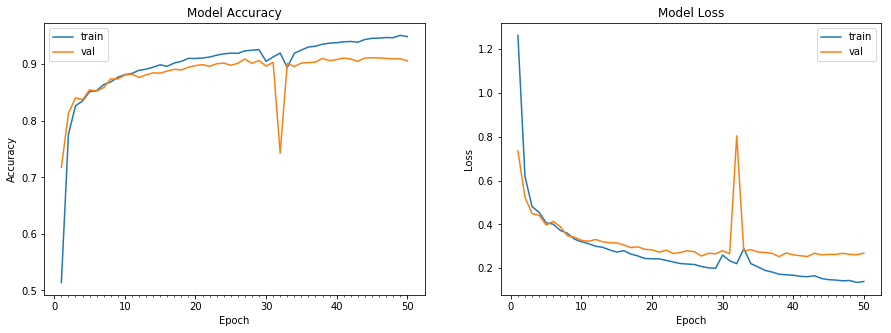

batch size    : 64
epochs        : 50
optimizer     : sgd
learning rate : 0.05
node size     : 128
Epoch 1/50
781/781 [==============================] - 94s 120ms/step - loss: 1.2442 - acc: 0.5247 - val_loss: 1.6949 - val_acc: 0.3225

Epoch 00001: val_loss improved from inf to 1.69491, saving model to models4/rnn_lstm.h5
Epoch 2/50
781/781 [==============================] - 94s 121ms/step - loss: 1.0423 - acc: 0.6068 - val_loss: 0.5668 - val_acc: 0.7901

Epoch 00002: val_loss improved from 1.69491 to 0.56683, saving model to models4/rnn_lstm.h5
Epoch 3/50
781/781 [==============================] - 94s 120ms/step - loss: 0.5288 - acc: 0.8090 - val_loss: 0.4622 - val_acc: 0.8283

Epoch 00003: val_loss improved from 0.56683 to 0.46217, saving model to models4/rnn_lstm.h5
Epoch 4/50
781/781 [==============================] - 93s 120ms/step - loss: 0.4410 - acc: 0.8378 - val_loss: 0.4095 - val_acc: 0.8479

Epoch 00004: val_loss improved from 0.46217 to 0.40952, saving model to models4/rnn_l

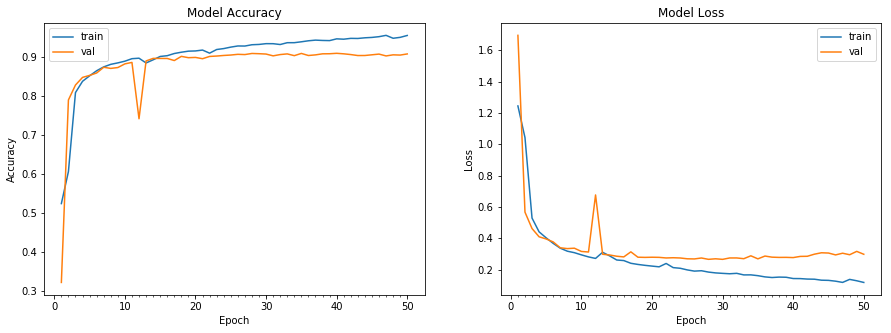

In [3]:
for batch_size in batch_sizes:
  for epochs in num_epochs:
    for optimizer_name in optimizers_name:
      for learning_rate in learning_rates:
        for node_size in node_sizes:
            print("==================")
            print("batch size    : {}".format(batch_size))
            print("epochs        : {}".format(epochs))
            print("optimizer     : {}".format(optimizer_name))
            print("learning rate : {}".format(learning_rate))
            print("node size     : {}".format(node_size))

            if optimizer_name == 'adam':
              optimizer = optimizers.Adam(lr=learning_rate)
            elif optimizer_name == 'rmsprop':
              optimizer = optimizers.RMSprop(lr=learning_rate)
            elif optimizer_name == 'sgd':
              optimizer = optimizers.SGD(lr=learning_rate, momentum=0.9,nesterov=True)

            # Embedding dimensions.
            row_hidden = node_size
            col_hidden = node_size

            
            TRAIN_BATCH_SIZE = batch_size
            TEST_BATCH_SIZE = (batch_size)
            TEST_BATCH_SIZE
            
            train_step = int(TRAIN_DATA_SIZE/TRAIN_BATCH_SIZE)
            test_step = int(TEST_DATA_SIZE/TEST_BATCH_SIZE)
            
            train_batches = train_gen.flow(x_train, y_train, batch_size=TRAIN_BATCH_SIZE, shuffle=False, seed=10)

            test_batches = test_gen.flow(x_test, y_test, batch_size=TEST_BATCH_SIZE, shuffle=False, seed=10)

            row, col, pixel = x_train.shape[1:]
            
            
            # 4D input.
            x = Input(shape=(row, col, pixel))

            # Encodes a row of pixels using TimeDistributed Wrapper.
            encoded_rows = TimeDistributed(LSTM(row_hidden))(x)

            # Encodes columns of encoded rows.
            encoded_columns = LSTM(col_hidden)(encoded_rows)

            # Final predictions and model.
            prediction = Dense(num_classes, activation='softmax')(encoded_columns)

            model = Model(x, prediction)
            model.compile(loss='categorical_crossentropy',
                          optimizer=optimizer,
                          metrics=['accuracy'])

            


            # Training.
            # model.fit(x_train, y_train,
            #           batch_size=batch_size,
            #           epochs=epochs,
            #           verbose=1,
            #           validation_data=(x_test, y_test))
            model_file_name = "models10/rnn_lstm_{}_{}_{}NMom_{}_{}.h5" . format(batch_size, epochs, optimizer_name, learning_rate, node_size)
            checkpoint = ModelCheckpoint(model_file_name, monitor='val_loss', verbose=0, save_best_only= True, mode='auto')

            best_model_file_name = "models10/rnn_lstm.h5"
            best_checkpoint = ModelCheckpoint(best_model_file_name, monitor='val_loss', verbose=1, save_best_only= True, mode='auto')
       
            h = model.fit_generator(train_batches, steps_per_epoch=train_step, validation_data=test_batches, callbacks=[checkpoint, best_checkpoint], validation_steps=test_step, epochs=epochs, verbose=1)
            #h = model.fit_generator(train_batches, validation_data=test_batches, callbacks=[checkpoint, best_checkpoint], verbose=1)
  
            plot_model(h)

In [ ]:
from google.colab import files

print(best_model)
print("Best Stats")
print("==========")
print("accuracy      : {}".format(best_accuracy))
print("batch size    : {}".format(best_batch_size))
print("epochs        : {}".format(best_epochs))
print("optimizer     : {}".format(best_optimizer))
print("learning rate : {}".format(best_learning_rate))
print("node size     : {}".format(best_node_size))

filepath = "models/rnn_lstm_best.h5"
files.download(filepath)